# Libraries

In [2]:
import numpy as np
import pandas as pd
import json
import glob
import ast
import gzip
import os
import yaml
from tqdm import tqdm
import re
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

# Functions

In [9]:
def filter_std_player_classes_monsters(df):
    # Convert the list of standard classes to a set for faster membership checks
    standard_classes = {
        'Barbarian', 'Bard', 'Cleric', 'Druid', 'Fighter', 'Monk', 
        'Paladin', 'Ranger', 'Rogue', 'Sorcerer', 'Warlock', 'Wizard', 'Blood Hunter'
    }

    def are_all_classes_standard(player_list_str):
        # Convert the string representation of the list only once
        player_list = ast.literal_eval(player_list_str)
        for player in player_list:
            # Iterate through each class information tuple
            for class_info in player['class']:
                # Check against the set of standard classes
                if class_info[0].strip() not in standard_classes:
                    return False
        return True
    
    # Filter rows based on player_info
    tqdm.pandas(desc="Filtering Players")
    df_filtered = df[df['player_info'].progress_apply(are_all_classes_standard)]
    
    # Filter rows based on monsters_info
    df_filtered = df_filtered[df_filtered['monsters_info'] != "[]"]

    # Filter rows based on party total hpratio
    df_filtered = df_filtered.dropna(subset=['party_total_hpratio'])
    
    # Filter rows based on party_total_precombat_hp
    df_filtered = df_filtered[df_filtered['party_total_precombat_hp']<1e10]

    # Filter rows based on party_total_precombat_hp
    df_filtered = df_filtered[df_filtered['party_total_postcombat_hp']<1e10]
    
    return df_filtered

# Workflow

In [10]:
combat_data_df = pd.read_csv("final_combat_data_df_03-25_FULL.csv")
print(combat_data_df.shape)

combat_data_filtered_df = filter_std_player_classes_monsters(combat_data_df)
print(combat_data_filtered_df.shape)

(24748, 44)


Filtering Players: 100%|██████████| 24748/24748 [00:05<00:00, 4536.31it/s]

(13774, 44)


In [11]:
csv_file_path = './filtered_combat_data_df_03-28.csv'
combat_data_filtered_df.to_csv(csv_file_path, index=False)

In [3]:
df = pd.read_csv('./filtered_combat_data_df_03-28.csv').drop(columns=['Unnamed: 0'])
# Display the first few rows of the dataset
display(df.head())
# Display summary statistics
display(df.describe())
# Check for missing values
#display(df.isnull().sum())

,combat_id,start_time,player_ids,player_info,monsters_info,party_size,total_slots,total_max_slots,party_classes_with_level,party_total_class_composition,...,party_total_precombat_hp,party_total_postcombat_hp,party_total_hpratio,party_total_prof_bonus,party_total_strength,party_total_dexterity,party_total_constitution,party_total_intelligence,party_total_wisdom,party_total_charisma
0,1663969629-c5cb4fec-4e5a-4e34-8fd3-4b86d729dd80,1.663970e+09,"['753313111965843135', '198813640578542210', '...","[{'hp_ratio': (147, 147), 'class': [('Fighter'...",[{'monster_id': 'af27cde4-5fca-42ed-a676-3ffec...,3,"{'1': 8, '2': 5, '3': 0, '4': 0, '5': 0, '6': ...","{'1': 8, '2': 5, '3': 0, '4': 0, '5': 0, '6': ...","[('Fighter', 13), ('Paladin', 7), ('Fighter', ...","['Fighter', 'Paladin', 'Fighter', 'Paladin']",...,205,167,0.814634,11,55,34,52,29,39,50
1,1667093704-73130db4-c26b-4778-a242-0b98c46adabc,1.667094e+09,['177558997848408361'],"[{'hp_ratio': (0, 23), 'class': [('Warlock', 4...",[{'monster_id': '4c7d90bb-9255-44a9-aa4e-f6ffa...,1,"{'1': 0, '2': 2, '3': 0, '4': 0, '5': 0, '6': ...","{'1': 0, '2': 2, '3': 0, '4': 0, '5': 0, '6': ...","[('Warlock', 4)]",['Warlock'],...,23,0,0.000000,2,20,9,10,12,14,19
2,1662316101-ff0b283d-fbfe-497c-b139-2f0c0a48f0bd,1.662316e+09,"['263880573407494191', '278328381340542754', '...","[{'hp_ratio': (133, 238), 'class': [('Fighter'...",[{'monster_id': '5b6213ac-cff6-416c-a8f0-78473...,4,"{'1': 8, '2': 6, '3': 6, '4': 3, '5': 3, '6': ...","{'1': 8, '2': 6, '3': 6, '4': 3, '5': 3, '6': ...","[('Fighter', 18), ('Blood Hunter', 16), ('Monk...","['Fighter', 'Blood Hunter', 'Monk', 'Cleric', ...",...,509,366,0.719057,23,55,58,68,37,64,56
3,1665031867-37c024ab-8ea8-4a95-8f27-7bed6426c383,1.665032e+09,['645474316434980766'],"[{'hp_ratio': (107, 107), 'class': [('Druid', ...",[{'monster_id': 'b2cd27b1-6e9e-42cb-bd32-9babc...,1,"{'1': 4, '2': 3, '3': 3, '4': 3, '5': 2, '6': ...","{'1': 4, '2': 3, '3': 3, '4': 3, '5': 2, '6': ...","[('Druid', 13)]",['Druid'],...,107,107,1.000000,5,10,16,16,10,20,12
4,1661703086-0acbaf03-f0dc-4884-bcfd-08bc33f68191,1.661703e+09,['423192139884408071'],"[{'hp_ratio': (147, 147), 'class': [('Fighter'...",[{'monster_id': '7c3aef0b-1606-46a7-92c9-5a43e...,1,"{'1': 0, '2': 1, '3': 0, '4': 0, '5': 0, '6': ...","{'1': 0, '2': 1, '3': 0, '4': 0, '5': 0, '6': ...","[('Fighter', 13)]",['Fighter'],...,147,147,1.000000,5,20,8,20,12,13,10


,start_time,party_size,monster_number,monster_total_level,party_total_level,party_level1_spellslots,party_level2_spellslots,party_level3_spellslots,party_level4_spellslots,party_level5_spellslots,...,party_total_precombat_hp,party_total_postcombat_hp,party_total_hpratio,party_total_prof_bonus,party_total_strength,party_total_dexterity,party_total_constitution,party_total_intelligence,party_total_wisdom,party_total_charisma
count,1.377400e+04,13774.000000,13774.000000,13774.000000,13774.0,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,...,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000
mean,1.661959e+09,2.141861,3.445187,16.074951,0.0,5.023595,3.047553,2.051909,1.267315,0.881371,...,209.476550,163.591186,0.783874,8.151372,30.267533,34.278496,35.178888,27.830478,31.165021,30.887760
std,4.228951e+06,1.641083,6.773686,32.207315,0.0,4.893265,3.321578,2.846032,2.294668,1.904077,...,300.070589,219.693151,0.270440,7.074247,24.987654,26.674573,27.731504,22.946699,24.674361,25.425813
min,1.653818e+09,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,2.000000,3.000000,5.000000,4.000000,5.000000,4.000000,3.000000
25%,1.658398e+09,1.000000,1.000000,5.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,65.000000,45.000000,0.662439,4.000000,12.000000,16.000000,15.000000,10.000000,13.000000,12.000000
50%,1.661944e+09,1.000000,1.000000,10.000000,0.0,4.000000,3.000000,0.000000,0.000000,0.000000,...,125.000000,98.000000,0.887412,6.000000,20.000000,21.000000,20.000000,19.000000,20.000000,20.000000
75%,1.665399e+09,3.000000,4.000000,16.000000,0.0,7.000000,4.000000,3.000000,2.000000,1.000000,...,244.000000,194.000000,1.000000,10.000000,41.000000,48.000000,49.000000,39.000000,44.000000,42.000000
max,1.669684e+09,24.000000,428.000000,2169.000000,0.0,67.000000,42.000000,34.000000,26.000000,21.000000,...,10824.000000,8141.000000,3.362924,127.000000,362.000000,412.000000,452.000000,359.000000,356.000000,389.000000


In [10]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns. drop(['start_time'])
print(num_features)

Index(['party_size', 'monster_number', 'monster_total_level',
       'party_total_level', 'party_level1_spellslots',
       'party_level2_spellslots', 'party_level3_spellslots',
       'party_level4_spellslots', 'party_level5_spellslots',
       'party_level6_spellslots', 'party_level7_spellslots',
       'party_level8_spellslots', 'party_level9_spellslots', 'party_total_ac',
       'party_total_precombat_hp', 'party_total_postcombat_hp',
       'party_total_hpratio', 'party_total_prof_bonus', 'party_total_strength',
       'party_total_dexterity', 'party_total_constitution',
       'party_total_intelligence', 'party_total_wisdom',
       'party_total_charisma'],
      dtype='object')


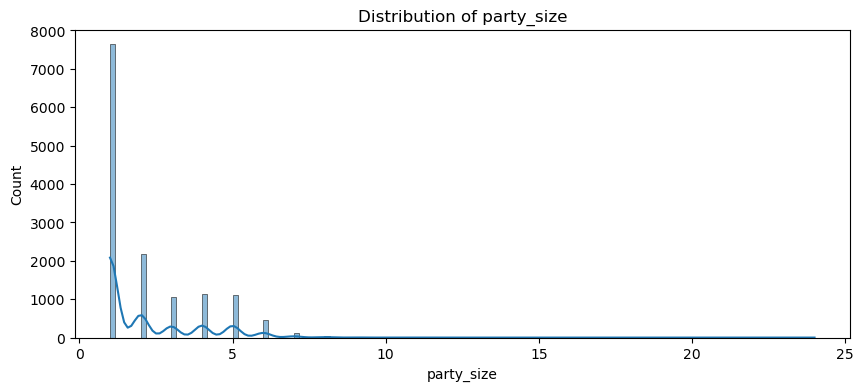

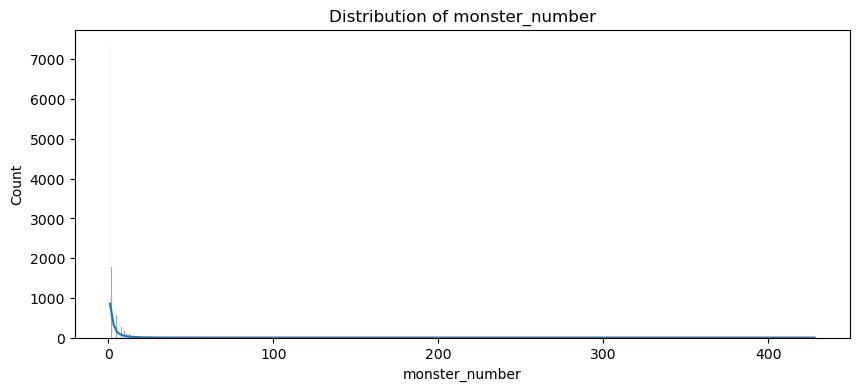

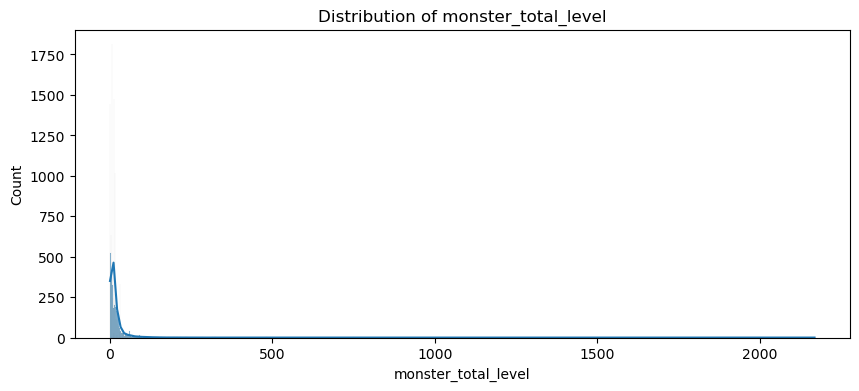

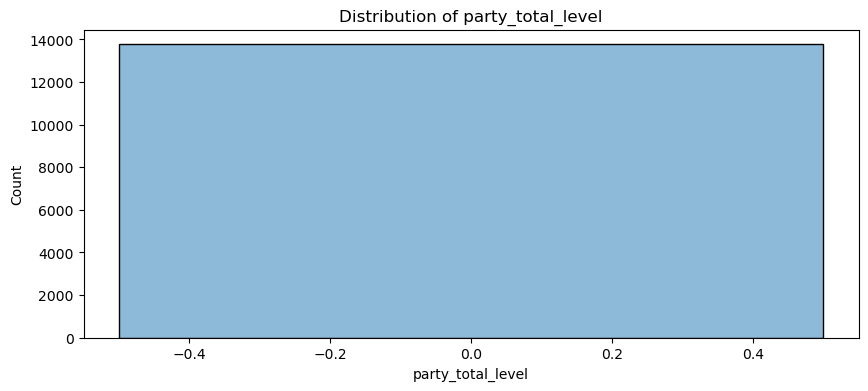

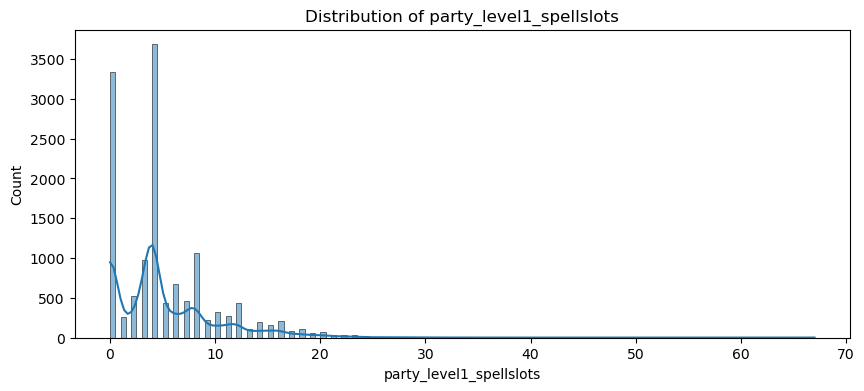

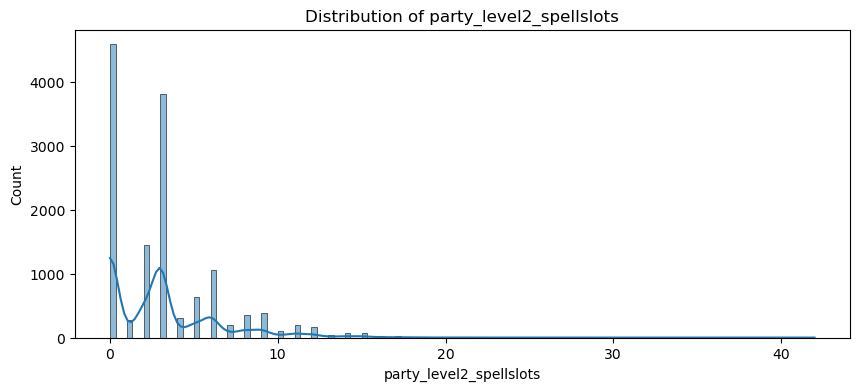

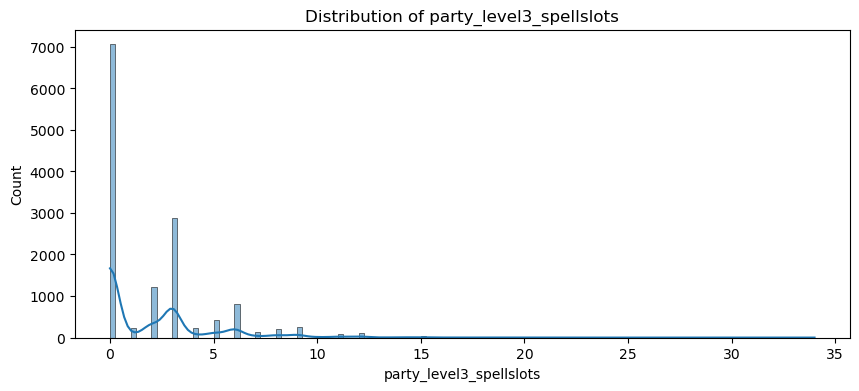

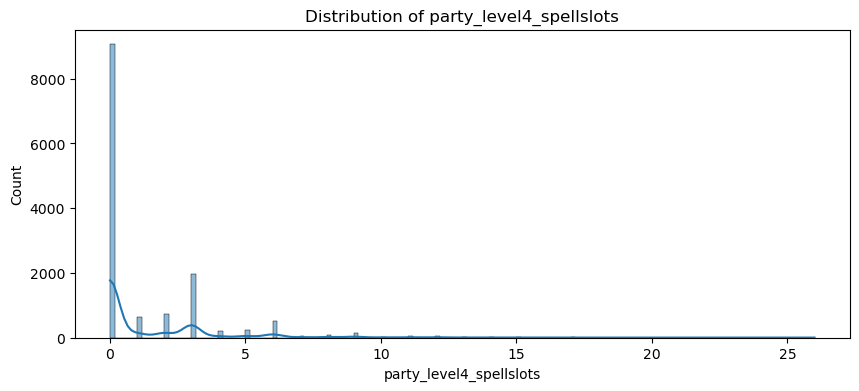

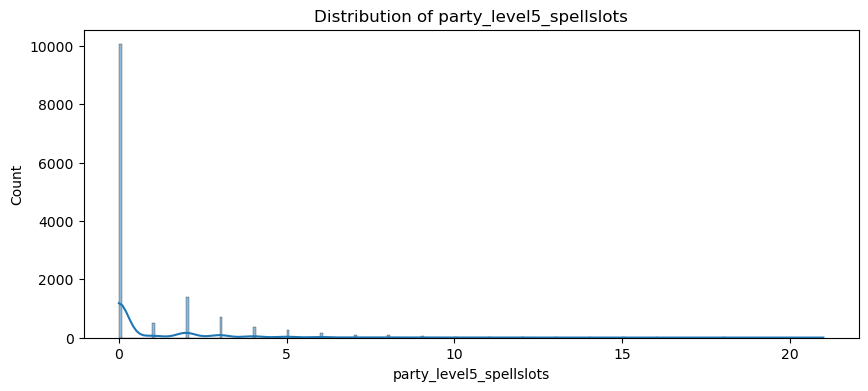

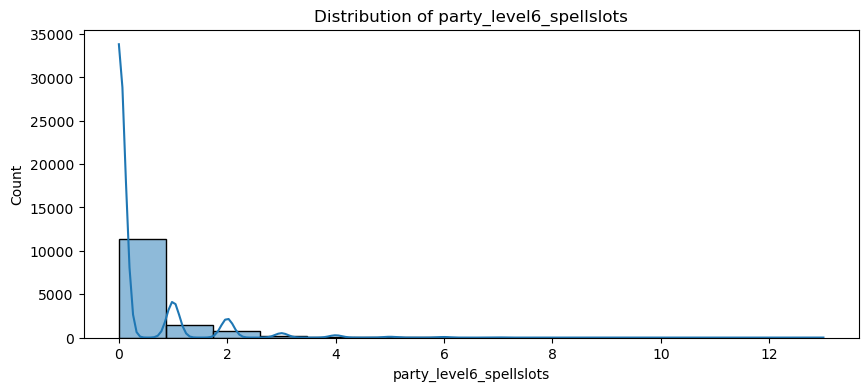

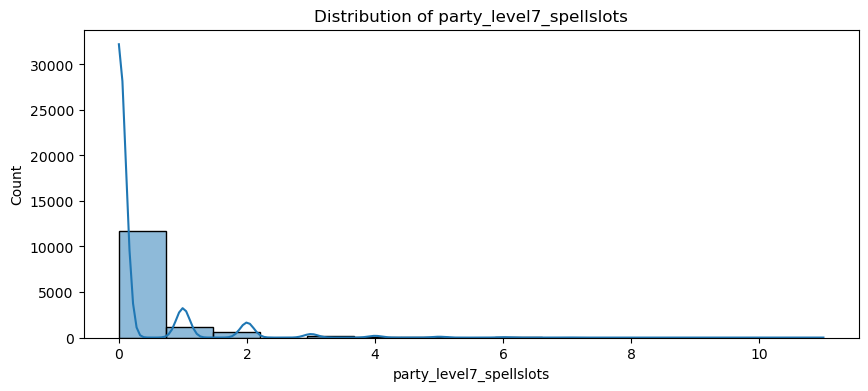

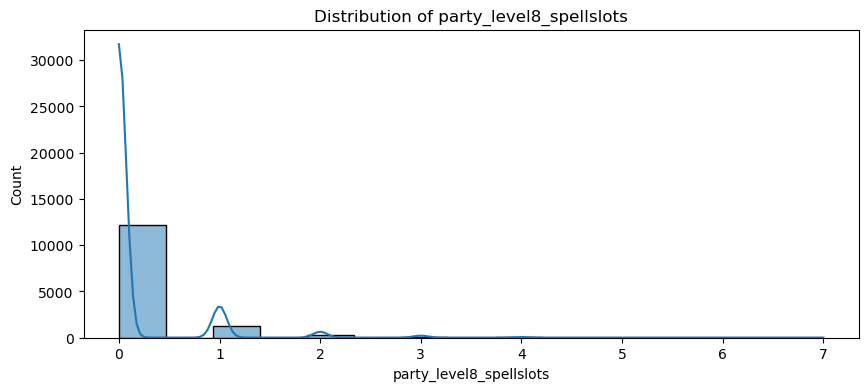

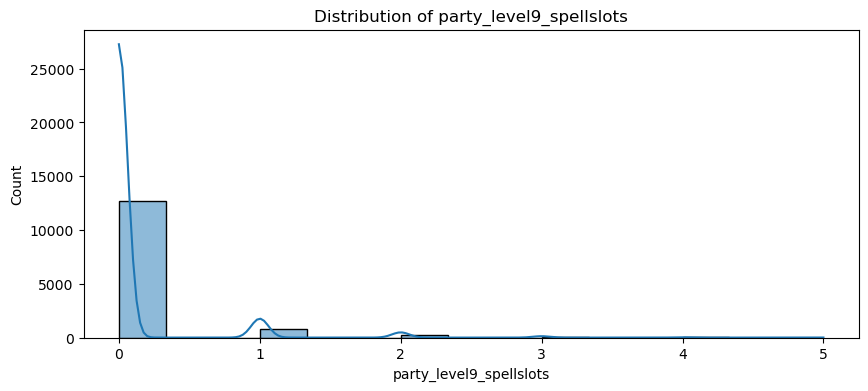

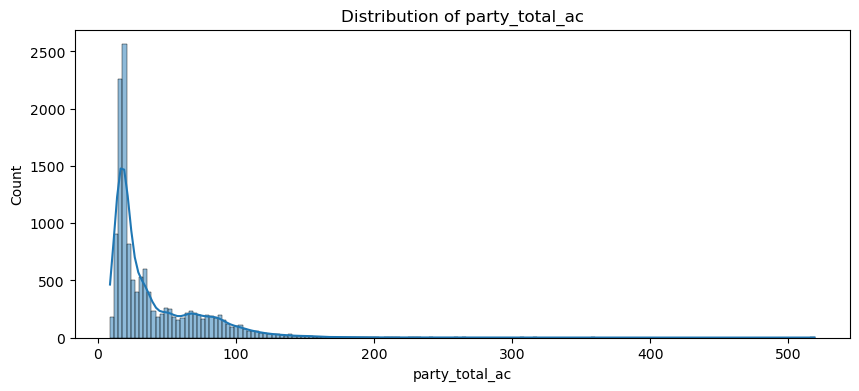

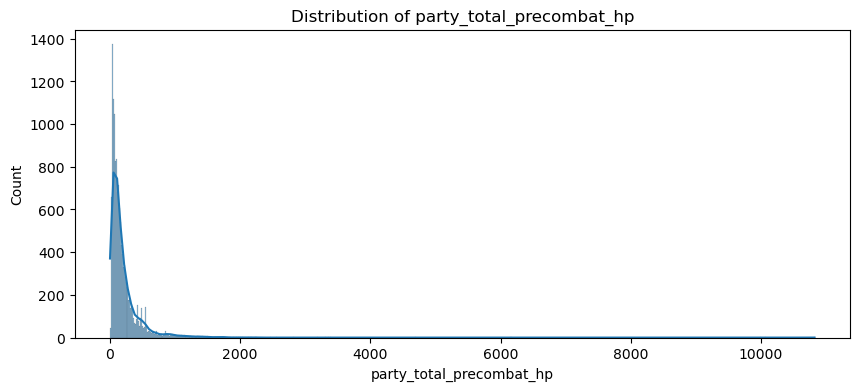

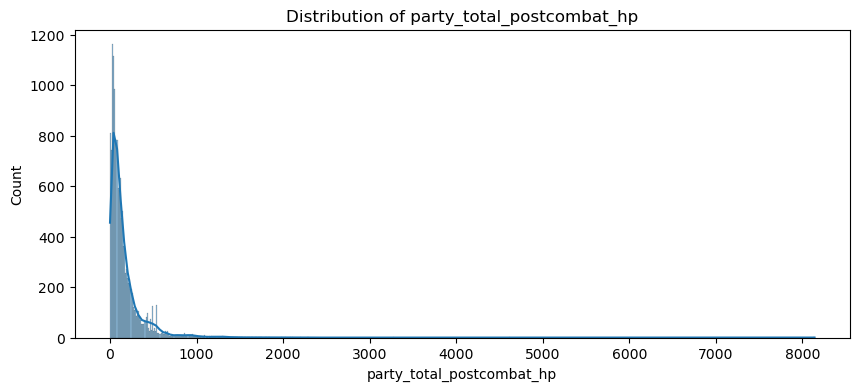

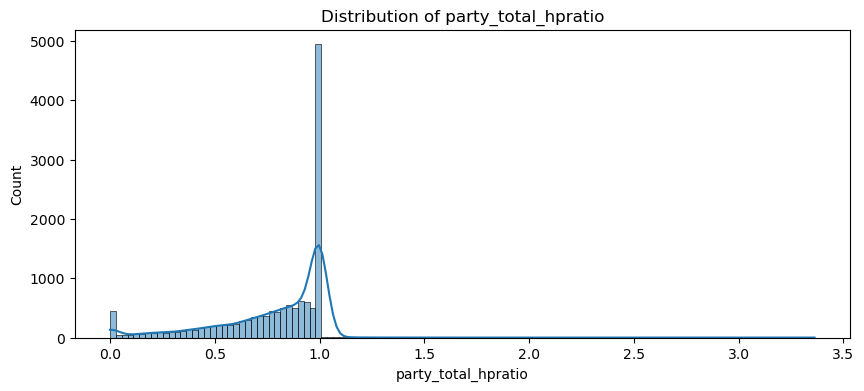

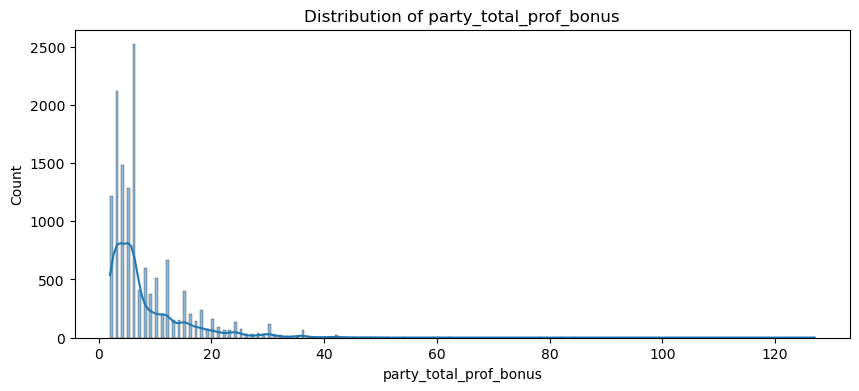

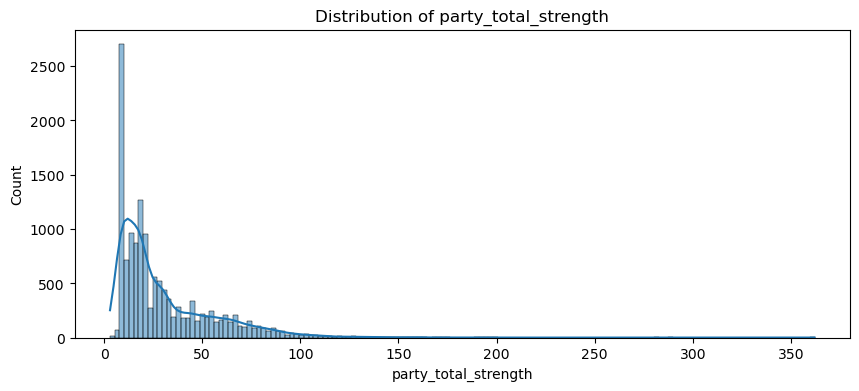

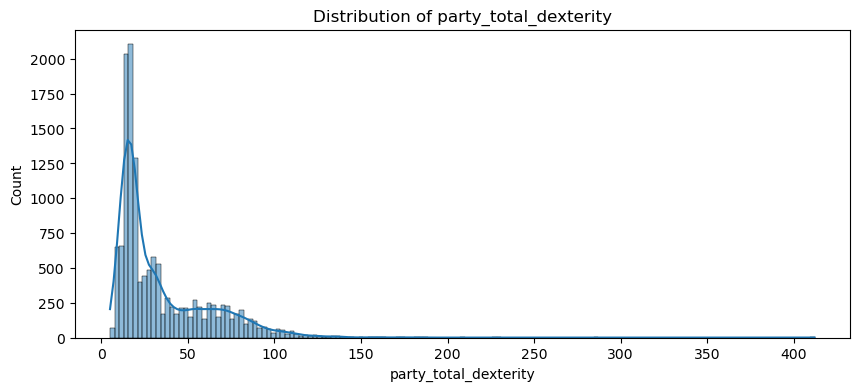

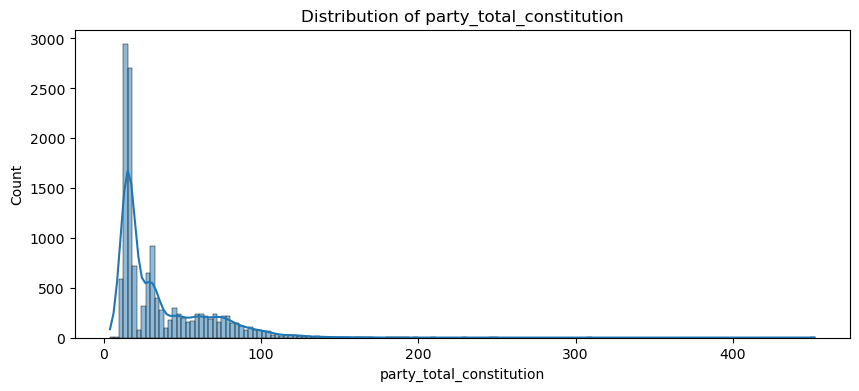

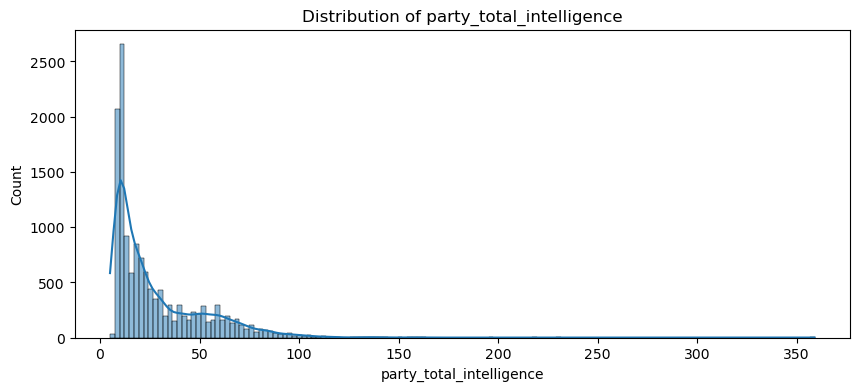

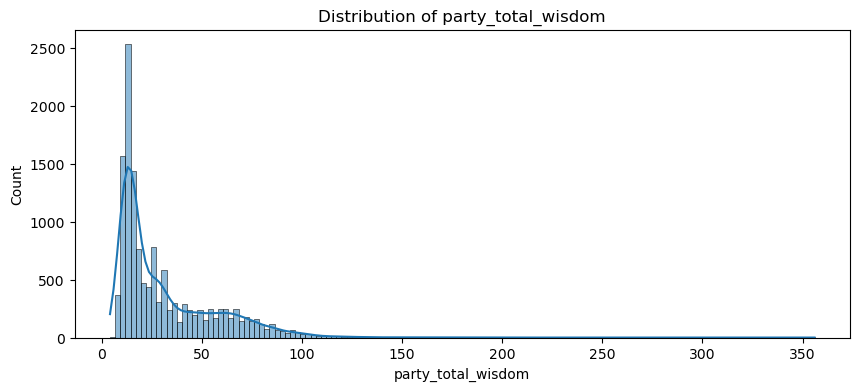

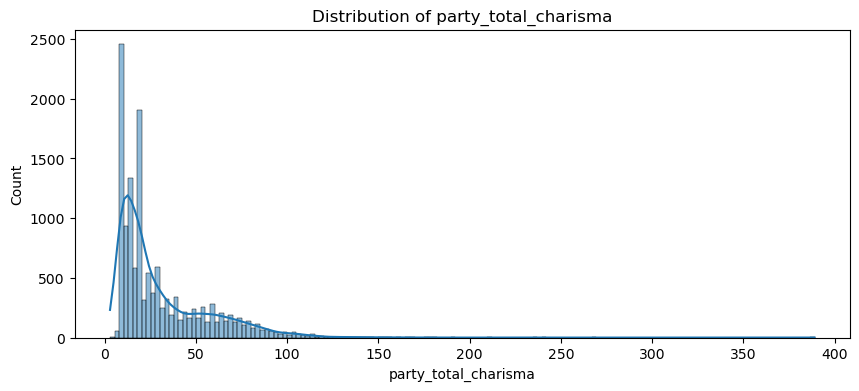

In [11]:
# Histograms for numerical features
for feature in num_features:
    try:
        plt.figure(figsize=(10, 4))
        sns.histplot(df[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()
    except:
        print(f"Failed {feature}")


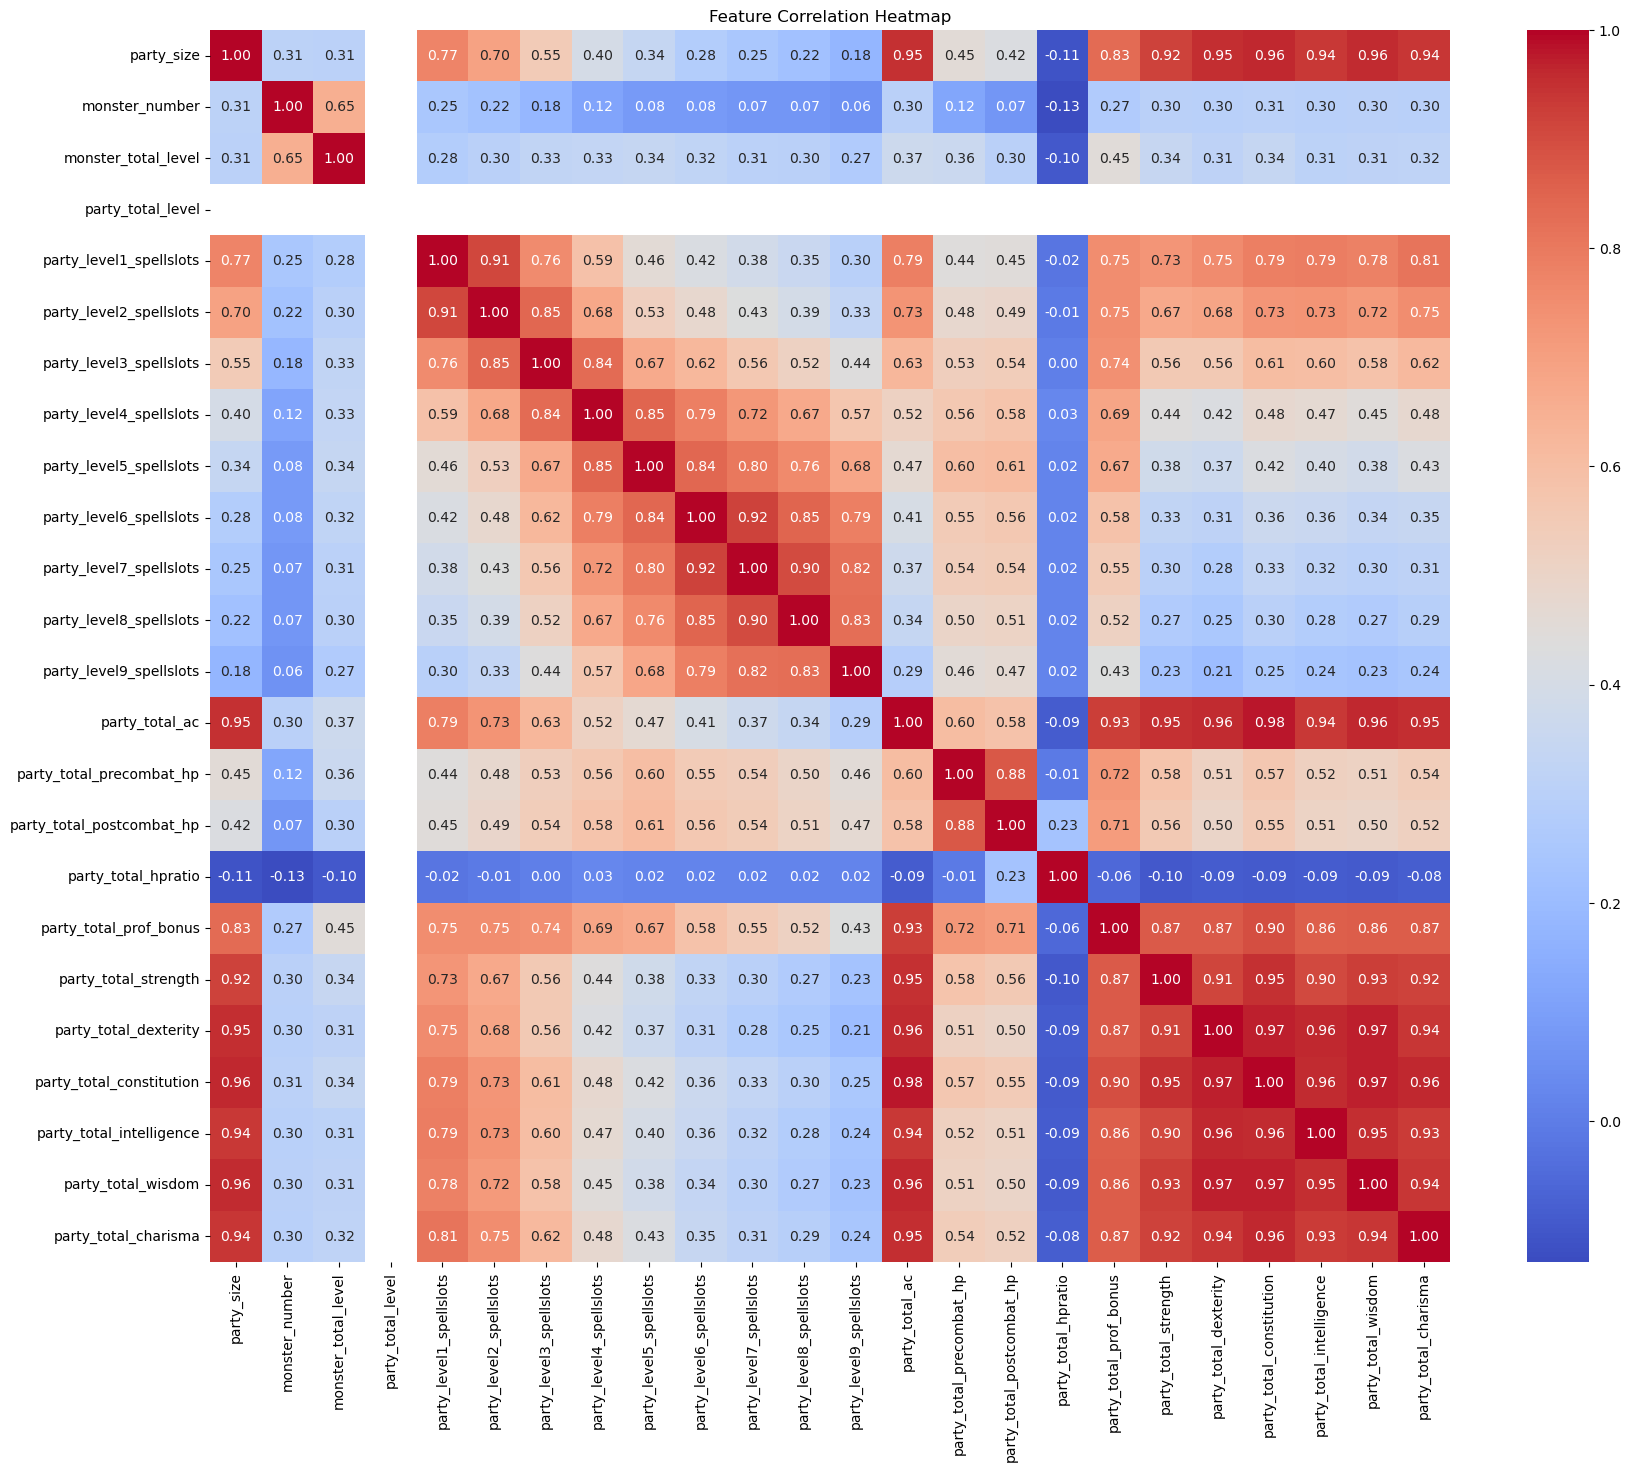

In [12]:
# Correlation heatmap for numerical features
corr = df[num_features].corr()
corr_filled = corr#corr.fillna(0)

plt.figure(figsize=(20, 16))
sns.heatmap(corr_filled, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

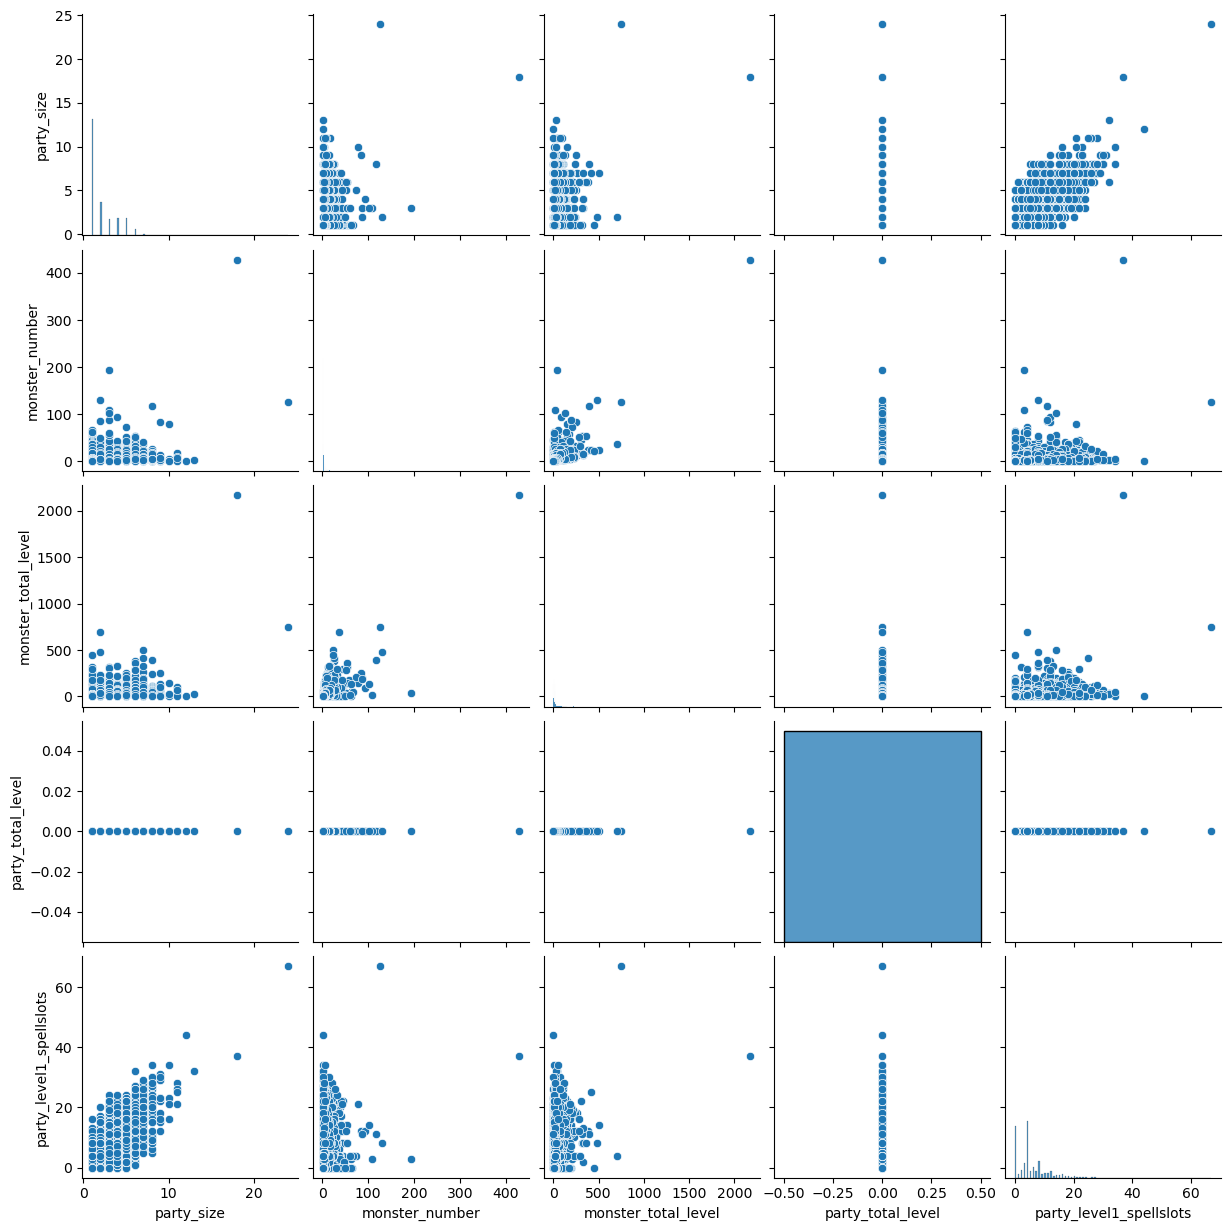

In [13]:
# Pairplots
sns.pairplot(df[num_features[:5]])
plt.show()